In [13]:
import numpy as np
import tensorflow as tf
import re
import pandas as pd

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = {
    "Review": [
        "Absolutely loved this movie! The story was gripping and the performances were top-notch.",
        "Terrible movie. Waste of time and money.",
        "An emotional rollercoaster! The screenplay was beautifully written.",
        "The plot was predictable and boring. Nothing new to see here.",
        "One of the best movies I have ever seen! The visuals were stunning.",
        "I fell asleep halfway through. The movie lacked excitement.",
        "The acting was superb, and the music score was phenomenal!",
        "Horrible script and even worse direction.",
        "A masterpiece! The cinematography was breathtaking.",
        "Not my cup of tea. Found it quite dull and uninspiring.",
        "Loved every minute of it. The character development was amazing!",
        "The dialogue was cringeworthy, and the pacing was off.",
        "Such a heartwarming story! Highly recommended.",
        "I regret watching this. The acting was terrible.",
        "An exhilarating experience from start to finish!",
        "The jokes felt forced, and the humor fell flat.",
        "A must-watch! Brilliant execution and storytelling.",
        "The editing was poor, making it hard to follow.",
        "The chemistry between the leads was fantastic!",
        "Nothing special. Just another cliché-filled drama.",
        "Absolutely mind-blowing! This movie will stay with me forever.",
        "The CGI was terrible and ruined the experience.",
        "A thrilling adventure that kept me on the edge of my seat!",
        "Disappointing. Expected much more based on the trailer.",
        "Beautifully shot and emotionally powerful.",
        "Boring from start to finish. Wouldn’t recommend.",
        "Incredible performances by the entire cast!",
        "One of the worst movies I’ve seen in years.",
        "A visual and storytelling masterpiece!",
        "Overhyped and underwhelming. Didn’t live up to expectations.",
        "Pure entertainment! Worth every second.",
        "I just couldn’t get into it. Too slow-paced.",
        "A heart-touching film that left me in tears!",
        "Too many plot holes and weak character arcs.",
        "A must-watch for anyone who loves good cinema!",
        "Predictable and not engaging at all.",
        "The soundtrack was amazing and added to the experience!",
        "The movie dragged on and felt never-ending.",
        "Stunning visuals and a gripping storyline!",
        "Mediocre at best. Didn’t leave any impact.",
        "A compelling story with fantastic performances!",
        "Not as good as everyone says. Overrated.",
        "A fantastic blend of action and drama!",
        "Wouldn’t watch it again. Lacked originality.",
        "One of the finest films of the decade!",
        "A dull and lifeless attempt at storytelling.",
        "An unforgettable cinematic experience!",
        "Bad acting and a weak script made this unbearable.",
        "A masterpiece in every sense!"],
    "Sentiment": [
        "Positive", "Negative", "Positive", "Negative", "Positive", "Negative", "Positive", "Negative", "Positive", "Negative",
        "Positive", "Negative", "Positive", "Negative", "Positive", "Negative", "Positive", "Negative", "Positive", "Negative",
        "Positive", "Negative", "Positive", "Negative", "Positive", "Negative", "Positive", "Negative", "Positive", "Negative",
        "Positive", "Negative", "Positive", "Negative", "Positive", "Negative", "Positive", "Negative", "Positive", "Negative",
        "Positive", "Negative", "Positive", "Negative", "Positive", "Negative", "Positive", "Negative", "Positive"
    ]
}

In [7]:
pattern = "\d*"

In [6]:
dummy = """1   data = {
2    "Review": [ "
"""


In [10]:
clean = re.sub(pattern, "", dummy)

In [11]:
print(clean)

   data = {
    "Review": [ "



In [14]:
df = pd.DataFrame(data)

In [15]:
df.head()

,Review,Sentiment
0,Absolutely loved this movie! The story was gri...,Positive
1,Terrible movie. Waste of time and money.,Negative
2,An emotional rollercoaster! The screenplay was...,Positive
3,The plot was predictable and boring. Nothing n...,Negative
4,One of the best movies I have ever seen! The v...,Positive


In [20]:
reviews = df["Review"].tolist()

In [21]:
reviews

['Absolutely loved this movie! The story was gripping and the performances were top-notch.',
 'Terrible movie. Waste of time and money.',
 'An emotional rollercoaster! The screenplay was beautifully written.',
 'The plot was predictable and boring. Nothing new to see here.',
 'One of the best movies I have ever seen! The visuals were stunning.',
 'I fell asleep halfway through. The movie lacked excitement.',
 'The acting was superb, and the music score was phenomenal!',
 'Horrible script and even worse direction.',
 'A masterpiece! The cinematography was breathtaking.',
 'Not my cup of tea. Found it quite dull and uninspiring.',
 'Loved every minute of it. The character development was amazing!',
 'The dialogue was cringeworthy, and the pacing was off.',
 'Such a heartwarming story! Highly recommended.',
 'I regret watching this. The acting was terrible.',
 'An exhilarating experience from start to finish!',
 'The jokes felt forced, and the humor fell flat.',
 'A must-watch! Brilliant 

In [22]:
sentiment = df["Sentiment"].tolist()

In [23]:
sentiment

['Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive']

In [24]:
tokenize = Tokenizer()

In [27]:
tokenize.fit_on_texts(reviews)

In [28]:
seq = tokenize.texts_to_sequences(reviews)

In [29]:
seq

[[28, 29, 9, 7, 1, 12, 3, 30, 2, 1, 13, 31, 64, 65],
 [14, 7, 66, 5, 67, 2, 68],
 [15, 69, 70, 1, 71, 3, 32, 72],
 [1, 33, 3, 34, 2, 35, 36, 73, 6, 74, 75],
 [16, 5, 1, 37, 38, 10, 76, 77, 39, 1, 40, 31, 41],
 [10, 42, 78, 79, 80, 1, 7, 43, 81],
 [1, 17, 3, 82, 2, 1, 83, 84, 3, 85],
 [86, 44, 2, 87, 88, 89],
 [4, 18, 1, 90, 3, 91],
 [19, 45, 92, 5, 93, 94, 8, 95, 46, 2, 96],
 [29, 20, 97, 5, 8, 1, 47, 98, 3, 48],
 [1, 99, 3, 100, 2, 1, 101, 3, 102],
 [103, 4, 104, 12, 105, 106],
 [10, 107, 108, 9, 1, 17, 3, 14],
 [15, 109, 11, 49, 50, 6, 51],
 [1, 110, 52, 111, 2, 1, 112, 42, 113],
 [4, 53, 21, 114, 115, 2, 22],
 [1, 116, 3, 117, 118, 8, 119, 6, 120],
 [1, 121, 122, 1, 123, 3, 23],
 [36, 124, 54, 125, 126, 127, 55],
 [28, 128, 129, 9, 7, 130, 131, 56, 24, 132],
 [1, 133, 3, 14, 2, 134, 1, 11],
 [4, 135, 136, 57, 137, 24, 25, 1, 138, 5, 45, 139],
 [140, 141, 142, 143, 144, 25, 1, 145],
 [32, 146, 2, 147, 148],
 [35, 49, 50, 6, 51, 58, 149],
 [150, 13, 151, 1, 152, 153],
 [16, 5, 1, 154,

In [30]:
vocab_size = len(tokenize.word_index)+1

In [31]:
vocab_size

216

In [32]:
tokenize.word_index

{'the': 1,
 'and': 2,
 'was': 3,
 'a': 4,
 'of': 5,
 'to': 6,
 'movie': 7,
 'it': 8,
 'this': 9,
 'i': 10,
 'experience': 11,
 'story': 12,
 'performances': 13,
 'terrible': 14,
 'an': 15,
 'one': 16,
 'acting': 17,
 'masterpiece': 18,
 'not': 19,
 'every': 20,
 'watch': 21,
 'storytelling': 22,
 'fantastic': 23,
 'me': 24,
 'on': 25,
 'in': 26,
 'at': 27,
 'absolutely': 28,
 'loved': 29,
 'gripping': 30,
 'were': 31,
 'beautifully': 32,
 'plot': 33,
 'predictable': 34,
 'boring': 35,
 'nothing': 36,
 'best': 37,
 'movies': 38,
 'seen': 39,
 'visuals': 40,
 'stunning': 41,
 'fell': 42,
 'lacked': 43,
 'script': 44,
 'my': 45,
 'dull': 46,
 'character': 47,
 'amazing': 48,
 'from': 49,
 'start': 50,
 'finish': 51,
 'felt': 52,
 'must': 53,
 'just': 54,
 'drama': 55,
 'with': 56,
 'that': 57,
 'wouldn’t': 58,
 'didn’t': 59,
 'too': 60,
 'weak': 61,
 'good': 62,
 'as': 63,
 'top': 64,
 'notch': 65,
 'waste': 66,
 'time': 67,
 'money': 68,
 'emotional': 69,
 'rollercoaster': 70,
 'screenpl

In [33]:
max_length = max([len(s) for s in seq])

In [35]:
max_length

14

In [36]:
padded_seq = sequence.pad_sequences(seq, maxlen=max_length, padding="post")

In [37]:
padded_seq

array([[ 28,  29,   9,   7,   1,  12,   3,  30,   2,   1,  13,  31,  64,
         65],
       [ 14,   7,  66,   5,  67,   2,  68,   0,   0,   0,   0,   0,   0,
          0],
       [ 15,  69,  70,   1,  71,   3,  32,  72,   0,   0,   0,   0,   0,
          0],
       [  1,  33,   3,  34,   2,  35,  36,  73,   6,  74,  75,   0,   0,
          0],
       [ 16,   5,   1,  37,  38,  10,  76,  77,  39,   1,  40,  31,  41,
          0],
       [ 10,  42,  78,  79,  80,   1,   7,  43,  81,   0,   0,   0,   0,
          0],
       [  1,  17,   3,  82,   2,   1,  83,  84,   3,  85,   0,   0,   0,
          0],
       [ 86,  44,   2,  87,  88,  89,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  4,  18,   1,  90,   3,  91,   0,   0,   0,   0,   0,   0,   0,
          0],
       [ 19,  45,  92,   5,  93,  94,   8,  95,  46,   2,  96,   0,   0,
          0],
       [ 29,  20,  97,   5,   8,   1,  47,  98,   3,  48,   0,   0,   0,
          0],
       [  1,  99,   3, 100,   2,   1, 101, 

In [38]:
labels = np.array([1 if i == "Positive" else 0 for i in sentiment])

In [39]:
labels

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1])

In [44]:
model = Sequential([
    Embedding(vocab_size, 64, input_length=max_length),
    SimpleRNN(64),
    Dense(1, activation="sigmoid")
])

In [45]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [46]:
model.fit(padded_seq, labels, epochs=100, verbose=True)

Epoch 1/100


2/2 [==============================] - 2s 13ms/step - loss: 0.6950 - accuracy: 0.3878
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 0.6364 - accuracy: 0.8367
Epoch 3/100
2/2 [==============================] - 0s 20ms/step - loss: 0.5813 - accuracy: 0.9388
Epoch 4/100
2/2 [==============================] - 0s 15ms/step - loss: 0.5145 - accuracy: 0.9388
Epoch 5/100
2/2 [==============================] - 0s 16ms/step - loss: 0.4313 - accuracy: 0.9592
Epoch 6/100
2/2 [==============================] - 0s 25ms/step - loss: 0.3330 - accuracy: 0.9592
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 0.2347 - accuracy: 0.9592
Epoch 8/100
2/2 [==============================] - 0s 16ms/step - loss: 0.1499 - accuracy: 1.0000
Epoch 9/100
2/2 [==============================] - 0s 14ms/step - loss: 0.0910 - accuracy: 1.0000
Epoch 10/100
2/2 [==============================] - 0s 20ms/step - loss: 0.0485 - accuracy: 1.0000
Epoch 11/100
2/2 

In [48]:
import matplotlib.pyplot as plt

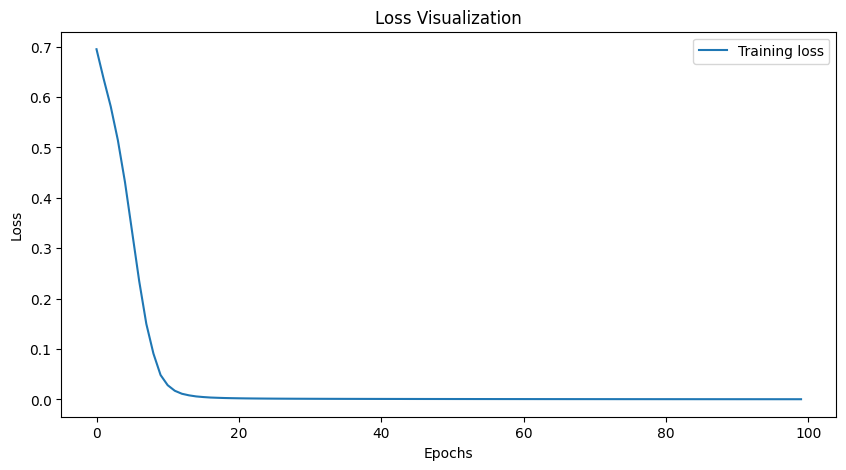

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(model.history.history['loss'], label="Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Visualization")
plt.legend()
plt.show()

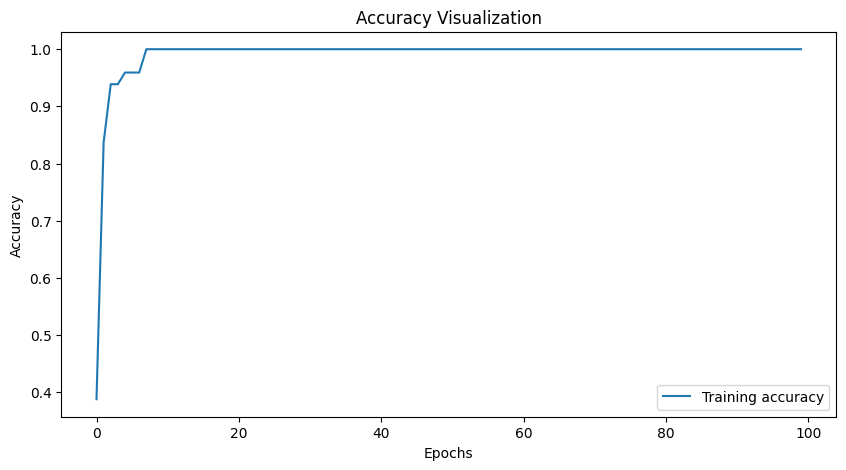

In [50]:
plt.figure(figsize=(10, 5))
plt.plot(model.history.history['accuracy'], label="Training accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Visualization")
plt.legend()
plt.show()

In [55]:
def sentiment_analyzer(sent):
    new_seq = tokenize.texts_to_sequences([sent])
    new_padded_seq = sequence.pad_sequences(new_seq, maxlen=max_length, padding="post")
    pred = model.predict(new_padded_seq)
    sentiment = "Positive" if pred >= 0.5 else "Negative"
    return sentiment

In [56]:
sent1 = "The cinematography was stunning, the film is masterpeace, a must watch"

In [57]:
sentiment_analyzer(sent1)

1/1 [==============================] - 0s 214ms/step


'Positive'

In [58]:
sent2 = "I couldn't stand watching it, a complete waste of time."

In [59]:
sentiment_analyzer(sent2)

1/1 [==============================] - 0s 46ms/step


'Negative'